/Users/finnwethall


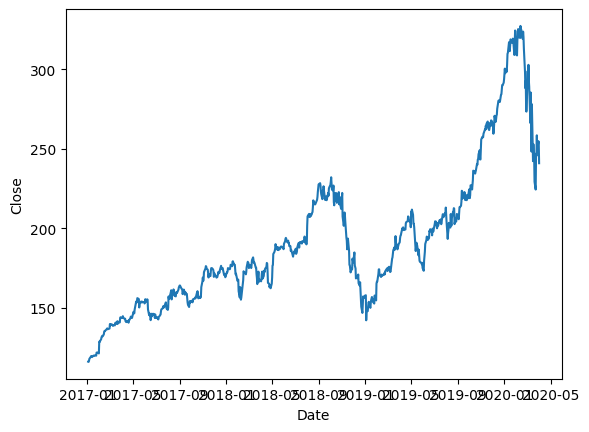

116.1500015258789
9092    116.150002
9093    115.150002
9094    116.150002
9095    117.150002
9096    116.150002
           ...    
9904    128.150002
9905    127.150002
9906    126.150002
9907    125.150002
9908    124.150002
Name: random_prediction, Length: 817, dtype: float64
           Date       Close  random_prediction  difference
9092 2017-01-03  116.150002         116.150002    0.000000
9093 2017-01-04  116.019997         115.150002    0.869995
9094 2017-01-05  116.610001         116.150002    0.459999
9095 2017-01-06  117.910004         117.150002    0.760002
9096 2017-01-09  118.989998         116.150002    2.839996
...         ...         ...                ...         ...
9904 2020-03-26  258.440002         128.150002  130.290001
9905 2020-03-27  247.740005         127.150002  120.590004
9906 2020-03-30  254.809998         126.150002  128.659996
9907 2020-03-31  254.289993         125.150002  129.139992
9908 2020-04-01  240.910004         124.150002  116.760002

[817 rows x

/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_73777/43779926.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_modern_df['random_prediction'] = walk
/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_73777/43779926.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_modern_df['difference'] = apple_modern_df['Close'] - apple_modern_df['random_prediction']


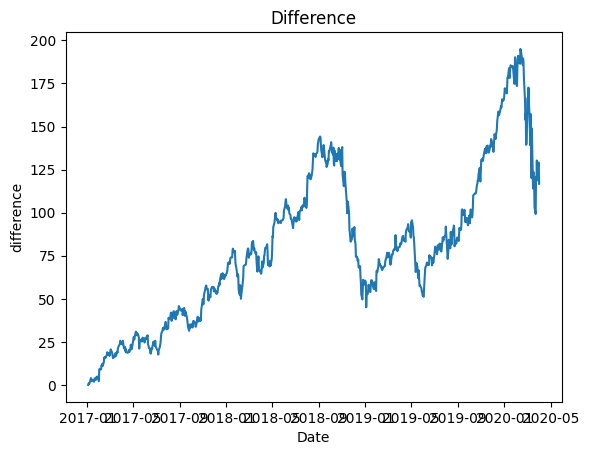

[[116.1500015258789, 117.1500015258789, 118.1500015258789, 119.1500015258789, 120.1500015258789, 121.1500015258789, 122.1500015258789, 123.1500015258789, 124.1500015258789, 125.1500015258789, 126.1500015258789, 127.1500015258789, 128.1500015258789, 129.1500015258789, 130.1500015258789, 131.1500015258789, 132.1500015258789, 133.1500015258789, 134.1500015258789, 135.1500015258789, 136.1500015258789, 137.1500015258789, 138.1500015258789, 139.1500015258789, 140.1500015258789, 141.1500015258789, 142.1500015258789, 143.1500015258789, 144.1500015258789, 145.1500015258789, 146.1500015258789, 147.1500015258789, 148.1500015258789, 149.1500015258789, 150.1500015258789, 151.1500015258789, 152.1500015258789, 153.1500015258789, 154.1500015258789, 155.1500015258789, 156.1500015258789, 157.1500015258789, 158.1500015258789, 159.1500015258789, 160.1500015258789, 161.1500015258789, 162.1500015258789, 163.1500015258789, 164.1500015258789, 165.1500015258789, 166.1500015258789, 167.1500015258789, 168.150001

In [4]:
%matplotlib inline

import numpy as np
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random
print(os.getcwd())
#os.chdir('/Users/finnwethall/Downloads')
apple_df = pd.read_csv('/Users/finnwethall/Downloads/archive/stocks/AAPL.csv')
apple_df['Date'] = pd.to_datetime(apple_df['Date'])


cutoff = datetime(2017,1,1)
apple_modern_df = apple_df[apple_df['Date'] > cutoff]


sns.lineplot(x='Date', y='Close', data=apple_modern_df)
plt.show()

#random Walk

#we initialize a random walk with starting value equal to that of the last stock price for the modern era. 
#this should create a general 
start = apple_df[apple_df['Date'] == '2017-01-03']['Close'].values[0]
print(start)
walk = [start]
#with i = 1000, we predict for roughly 3 years
for i in range(len(apple_modern_df['Date'])-1):
    up_or_down = random.randint(0,1)
    
    if up_or_down == 1:
        val = walk[-1] +1
        walk.append(val)
    else :
        val = walk[-1]-1
        walk.append(val)


#print(walk)
#plt.plot(range(len(walk)), walk)
#plt.title('Walk')
#plt.show()

temp = [start]
#temp[-1] + random.randint(-1,1) for date in apple_modern_df['Date']
apple_modern_df['random_prediction'] = walk

print(apple_modern_df['random_prediction'])

#sns.lineplot(data=apple_modern_df, x='Date', y='random_prediction')
#plt.show()

apple_modern_df['difference'] = apple_modern_df['Close'] - apple_modern_df['random_prediction']

print(apple_modern_df[['Date', 'Close', 'random_prediction','difference']])

sns.lineplot(data=apple_modern_df, x='Date', y='difference')
plt.title('Difference')
plt.show()


def test_model_probs(sets):
    final_walks = []
    for num in sets:
        walk = [start]
        for i in range(len(apple_modern_df['Date'])-1):
            up_or_down = np.random.choice([0,1], p=[num, 1-num])
    
            if up_or_down == 1:
                val = walk[-1] +1
                walk.append(val)
            else :
                val = walk[-1]-1
                walk.append(val)
        final_walks.append(walk)

    return final_walks

print(test_model_probs(np.arange(0,1,10)))
        
        
        
